# Results

In [2]:
from nilearn import datasets, plotting, regions
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io as sio
from nilearn.image import index_img
import mvlearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
current_dir = os.getcwd()

In [5]:
nilearn_HO_atlas = datasets.fetch_atlas_harvard_oxford(atlas_name = "cort-maxprob-thr25-2mm", symmetric_split = True)
atlas_ind_path = os.path.join(current_dir,"", 'HarvardOxford_Atlas_NewIndex_YCG.xlsx')
HO_excel = pd.read_excel(atlas_ind_path)
HO_indices_pd = pd.DataFrame(HO_excel, columns= ['New Index'])
HO_indices_np = HO_indices_pd.to_numpy()
nilearn_HO_atlas_L = datasets.fetch_atlas_harvard_oxford(atlas_name = "cort-maxprob-thr25-2mm", symmetric_split = True)
HO_cortical_indices = np.squeeze(HO_indices_np, axis = None)
HO_cortical_indices = HO_cortical_indices[0:96]
labels = nilearn_HO_atlas['labels'][1:97]


In [6]:
from nilearn.image import index_img
from nilearn.surface import vol_to_surf
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
fsaverage = datasets.fetch_surf_fsaverage()

def get_surf_texture(data, atlas):
    signal = np.expand_dims(data, axis = 0)
    region_labels = regions.signals_to_img_labels(signals = signal,
                                                labels_img = atlas)
    vis = index_img(region_labels, 0)
    texture_l = vol_to_surf(vis, fsaverage['pial_left'])
    texture_r = vol_to_surf(vis, fsaverage['pial_right'])
    return texture_l, texture_r

def plot_stat_surf(statistic, surf_type, cmap, colorbar_1 = False, colorbar_2 = False, colorbar_3 = False, colorbar_4 = False, darkness = 0.5):
    figure, axes = plt.subplots(1, 4, subplot_kw=dict(projection='3d'), figsize = (20, 7), dpi=300) 
    texture_l, texture_r = get_surf_texture(statistic, nilearn_HO_atlas['maps'])
    plotting.plot_surf_stat_map(fsaverage['{}_left'.format(surf_type)], texture_l, hemi='left', view = 'lateral', threshold = 0.00000001,
                            title='LH, Lateral', cmap = cmap, colorbar=colorbar_1, darkness = darkness, bg_on_data=True, figure = figure, axes = axes[0],
                            bg_map=fsaverage.sulc_left)
    plotting.plot_surf_stat_map(fsaverage['{}_left'.format(surf_type)], texture_l, hemi='left', view = 'medial', threshold = 0.00000001,
                            title='LH, Medial', cmap = cmap, colorbar=colorbar_2, darkness = darkness, bg_on_data=True, figure = figure, axes = axes[1],
                            bg_map=fsaverage.sulc_left)
    plotting.plot_surf_stat_map(fsaverage['{}_right'.format(surf_type)], texture_r, hemi='right', view = 'medial', threshold = 0.00000001,
                            title='RH, Medial', cmap = cmap,  colorbar=colorbar_3, darkness = darkness, bg_on_data=True, figure = figure, axes = axes[2],
                            bg_map=fsaverage.sulc_right)
    plotting.plot_surf_stat_map(fsaverage['{}_right'.format(surf_type)], texture_r, hemi='right', view = 'lateral', threshold = 0.00000001,
                            title='RH, Lateral', cmap = cmap, colorbar=colorbar_4, darkness = darkness, bg_on_data=True, figure = figure, axes = axes[3],
                            bg_map=fsaverage.sulc_right)

    

In [7]:
fmri_ind_path = os.path.join(current_dir,"", "ROISignals_FunImgARCWF", "", "ROISignals_%s.mat")
phenotype_path = os.path.join(current_dir,"", "REST-meta-MDD-PhenotypicData_WithHAMDSubItem_V4.xlsx")


In [8]:
#Importing drug naïve subjects with MDD
data_DN_MDD = [] # N = 446 

subj_excel_DN_MDD = pd.read_excel(phenotype_path, sheet_name = 'Drug Naïve MDD', converters = {'ID':str})
subj_excel_DN_MDD['Group'] = 'Drug-Naïve MDDs'
df_subj_DN_MDD = pd.DataFrame(subj_excel_DN_MDD, columns= ['ID', 'Sex', 'Age', 'Education (years)', 'Group'])
df_subj_DN_MDD = df_subj_DN_MDD.drop([45])

subj_ID_DN_MDD = df_subj_DN_MDD['ID'].to_numpy()
subj_ID_DN_MDD_array = np.squeeze(subj_ID_DN_MDD, axis = None)

for subject in subj_ID_DN_MDD_array:
    DN_MDD_matlab_file = sio.loadmat(fmri_ind_path % subject)
    DN_MDD_timeseries = np.asarray(DN_MDD_matlab_file["ROISignals"][:, 116:212])
    data_DN_MDD.append(DN_MDD_timeseries.T)


In [9]:
#Importing subjects on medication
data_MED_MDD = [] # N = 382

subj_excel_MED_MDD = pd.read_excel(phenotype_path, sheet_name = 'On Medication', converters = {'ID':str})
subj_excel_MED_MDD['Group'] = 'MDDs on Medication'
df_subj_MED_MDD = pd.DataFrame(subj_excel_MED_MDD, columns= ['ID', 'Sex', 'Age', 'Education (years)', 'Group'])
df_subj_MED_MDD = df_subj_MED_MDD.drop([117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143])

subj_ID_MED_MDD = df_subj_MED_MDD['ID'].to_numpy()
subj_ID_MED_MDD_array = np.squeeze(subj_ID_MED_MDD, axis = None)

for subject in subj_ID_MED_MDD_array:
    MED_MDD_matlab_file = sio.loadmat(fmri_ind_path % subject)
    MED_MDD_timeseries = np.asarray(MED_MDD_matlab_file["ROISignals"][:, 116:212])
    data_MED_MDD.append(MED_MDD_timeseries.T)


In [10]:
#Importing controls
data_NC = [] # N = 446 

subj_excel_NC = pd.read_excel(phenotype_path, sheet_name = 'Controls', converters = {'ID':str})
subj_excel_NC['Group'] = 'Controls'
df_subj_NC = pd.DataFrame(subj_excel_NC, columns= ['ID', 'Sex', 'Age', 'Education (years)', 'Group'])
df_subj_NC = df_subj_NC.drop([91,92, 220, 221, 222, 223, 270, 271, 272, 273, 274, 275, 276])
df_subj_NC = df_subj_NC[df_subj_NC['Age'] != 0] # removing subjects with age == 0

subj_ID_NC = df_subj_NC['ID'].to_numpy()
subj_ID_NC_array = np.squeeze(subj_ID_NC, axis = None)

for subject in subj_ID_NC_array[0:446]:
    NC_matlab_file = sio.loadmat(fmri_ind_path % subject)
    NC_timeseries = np.asarray(NC_matlab_file["ROISignals"][:, 116:212])
    data_NC.append(NC_timeseries.T) 
 
data_NC_small = data_NC[0:382] # N = 382 for the comparison with the subjects on meds



In [11]:
df_desc_stat = pd.concat([df_subj_DN_MDD, df_subj_MED_MDD, df_subj_NC[:446]], ignore_index=True)


In [12]:
# Regular expressions to extract site
import re

site = re.compile(r'(?<=S)[0-9]+')
df_desc_stat['Site'] = [np.asarray(site.findall(i[1])) for i in df_desc_stat['ID'].items()]
df_desc_stat['Site'] = [str(i[1].squeeze()) for i in df_desc_stat['Site'].items()]
site_order = sorted(df_desc_stat['Site'].unique(), key = lambda x: int(x))
df_desc_stat['Site'] = pd.Categorical(df_desc_stat['Site'], site_order)

In [13]:
#All data
ALL_DATA = data_DN_MDD + data_MED_MDD + data_NC

In [14]:
#Fitting on the data of all subjects

from mvlearn.embed import GCCA

gcca = GCCA(n_components = 2) # or specify another thresholding eg, n_components=5 or fraction_var=0.8

gcca.fit(ALL_DATA)

projs = gcca.transform(ALL_DATA)


GCCA(n_components=2)

In [15]:
# Dividing GCCA-transformed data into groups
projs_DN_MDD = projs[:446]
projs_MED_MDD = projs[446:828]
projs_NC = projs[828:]
projs_NC_small = projs[828:1210]

In [17]:
# Numpy arrays containing dependent variables (Gradient Scores)
projs_DN_NC_1 = np.concatenate((projs_DN_MDD[:, :, 0], projs_NC[:, :, 0]))
projs_DN_NC_2 = np.concatenate((projs_DN_MDD[:, :, 1], projs_NC[:, :, 1]))

projs_MED_NC_1 = np.concatenate((projs_MED_MDD[:, :, 0], projs_NC[:, :, 0]))
projs_MED_NC_2 = np.concatenate((projs_MED_MDD[:, :, 1], projs_NC[:, :, 1]))

In [18]:
# Numpy arrays containing explanatory variables (Group)
group_DN_NC = df_desc_stat['Group'][(df_desc_stat['Group'] == 'Drug-Naïve MDDs') | (df_desc_stat['Group'] == 'Controls')]
group_DN_NC.loc[group_DN_NC == 'Drug-Naïve MDDs'] = 1
group_DN_NC.loc[group_DN_NC == 'Controls'] = 0
group_DN_NC = group_DN_NC.to_numpy()

group_MED_NC = df_desc_stat['Group'][(df_desc_stat['Group'] == 'MDDs on Medication') | (df_desc_stat['Group'] == 'Controls')]
group_MED_NC.loc[group_MED_NC == 'MDDs on Medication'] = 1
group_MED_NC.loc[group_MED_NC == 'Controls'] = 0
group_MED_NC = group_MED_NC.to_numpy()


In [46]:
# Dummy variables for sex: 0 = male, 1 = female
df_desc_stat['Sex'].loc[df_desc_stat['Sex'] == 1] = 0
df_desc_stat['Sex'].loc[df_desc_stat['Sex'] == 2] = 1

# Numpy arrays containing confounding (nuisance) variables (Sex, Age, Education & Site)
sex_DN_NC = df_desc_stat['Sex'][(df_desc_stat['Group'] == 'Drug-Naïve MDDs') | (df_desc_stat['Group'] == 'Controls')].to_numpy()
age_DN_NC = df_desc_stat['Age'][(df_desc_stat['Group'] == 'Drug-Naïve MDDs') | (df_desc_stat['Group'] == 'Controls')].to_numpy()
education_DN_NC = df_desc_stat['Education (years)'][(df_desc_stat['Group'] == 'Drug-Naïve MDDs') | (df_desc_stat['Group'] == 'Controls')].to_numpy()
site_DN_NC = df_desc_stat['Site'][(df_desc_stat['Group'] == 'Drug-Naïve MDDs') | (df_desc_stat['Group'] == 'Controls')].to_numpy()

sex_MED_NC = df_desc_stat['Sex'][(df_desc_stat['Group'] == 'MDDs on Medication') | (df_desc_stat['Group'] == 'Controls')][:382*2].to_numpy()
age_MED_NC = df_desc_stat['Age'][(df_desc_stat['Group'] == 'MDDs on Medication') | (df_desc_stat['Group'] == 'Controls')][:382*2].to_numpy()
education_MED_NC = df_desc_stat['Education (years)'][(df_desc_stat['Group'] == 'MDDs on Medication') | (df_desc_stat['Group'] == 'Controls')][:382*2].to_numpy()
site_MED_NC = df_desc_stat['Site'][(df_desc_stat['Group'] == 'MDDs on Medication') | (df_desc_stat['Group'] == 'Controls')][:382*2].to_numpy()

group_DN_NC = group_DN_NC.astype(bool)
site_DN_NC = site_DN_NC.astype(int)

group_MED_NC = group_MED_NC.astype(bool)
site_MED_NC = site_MED_NC.astype(int)

In [21]:
# 3-D array containing confounding vars
conf_vars_DN_NC = np.concatenate((sex_DN_NC.reshape(892, 1), 
                                  age_DN_NC.reshape(892, 1), 
                                  education_DN_NC.reshape(892, 1),
                                  site_DN_NC.reshape(892, 1)), 
                                   axis = 1)


In [22]:
conf_vars_MED_NC = np.concatenate((sex_MED_NC.reshape(382*2, 1), 
                                   age_MED_NC.reshape(382*2, 1), 
                                   education_MED_NC.reshape(382*2, 1),
                                   site_MED_NC.reshape(382*2, 1)), 
                                   axis = 1)

In [23]:
from nilearn.mass_univariate import permuted_ols

permuted_DN_NC_1 = permuted_ols(group_DN_NC,
                                projs_DN_NC_1,
                                conf_vars_DN_NC,
                                model_intercept = True)


In [24]:
permuted_DN_NC_2 = permuted_ols(group_DN_NC,
                                projs_DN_NC_2,
                                conf_vars_DN_NC,
                                model_intercept = True)

In [25]:
permuted_MED_NC_1 = permuted_ols(group_MED_NC[:382*2],
                                projs_MED_NC_1[:382*2],
                                conf_vars_MED_NC,
                                model_intercept = True)

In [26]:
permuted_MED_NC_2 = permuted_ols(group_MED_NC[:382*2],
                                projs_MED_NC_2[:382*2],
                                conf_vars_MED_NC,
                                model_intercept = True)

In [27]:
# permuted_ols returns -log10 p-values. Undoing the -log10 transform
for i in range(0,96):
    permuted_DN_NC_1[0][0][i] = 10 ** (-permuted_DN_NC_1[0][0][i])


In [28]:
for i in range(0,96):
    permuted_DN_NC_2[0][0][i] = 10 ** (-permuted_DN_NC_2[0][0][i])


In [29]:
for i in range(0,96):
    permuted_MED_NC_1[0][0][i] = 10 ** (-permuted_MED_NC_1[0][0][i])
    

In [30]:
for i in range(0,96):
    permuted_MED_NC_2[0][0][i] = 10 ** (-permuted_MED_NC_2[0][0][i])
    

In [31]:
#Function: t-statistic to Cohen's d
def t_to_cohens_d(t, n1, n2):
    from math import sqrt
    if n1 == n2:
        d = 2 * t / sqrt(n1 + n2 - 2)
    else:
        d = t * sqrt(1/n1 + 1/n2)
    return d

In [32]:
ols_perm_d_DN_NC_1 = np.empty(96)

for i in range(0,96):
    if permuted_DN_NC_1[0][0][i] <= 0.05:
        ols_perm_d_DN_NC_1[i] = t_to_cohens_d(permuted_DN_NC_1[1][0][i], 446, 446)
    elif permuted_DN_NC_1[0][0][i] > 0.05:
        ols_perm_d_DN_NC_1[i] = None
    

In [33]:
ols_perm_d_DN_NC_2 = np.empty(96)

for i in range(0,96):
    if permuted_DN_NC_2[0][0][i] <= 0.05:
        ols_perm_d_DN_NC_2[i] = t_to_cohens_d(permuted_DN_NC_2[1][0][i], 446, 446)
    elif permuted_DN_NC_2[0][0][i] > 0.05:
        ols_perm_d_DN_NC_2[i] = None
        

In [34]:
ols_perm_d_MED_NC_1 = np.empty(96)

for i in range(0,96):
    if permuted_MED_NC_1[0][0][i] <= 0.05:
        ols_perm_d_MED_NC_1[i] = t_to_cohens_d(permuted_MED_NC_1[1][0][i], 446, 446)
    elif permuted_MED_NC_1[0][0][i] > 0.05:
        ols_perm_d_MED_NC_1[i] = None

In [35]:
ols_perm_d_MED_NC_2 = np.empty(96)

for i in range(0,96):
    if permuted_MED_NC_2[0][0][i] <= 0.05:
        ols_perm_d_MED_NC_2[i] = t_to_cohens_d(permuted_MED_NC_2[1][0][i], 446, 446)
    elif permuted_MED_NC_2[0][0][i] > 0.05:
        ols_perm_d_MED_NC_2[i] = None

In [36]:
#Check all Cohen's d values and HO labels
def print_cohen_d(cohen_d_array):
    len_array = np.where(np.isnan(cohen_d_array) == False)[0]
    for i in range(0, len(len_array)):
        label = labels[np.where(np.isnan(cohen_d_array) == False)[0][i]]
        cohen_d = cohen_d_array[np.where(np.isnan(cohen_d_array) == False)[0][i]]
        print(label, ", Cohen's d = ", cohen_d)
        

## Altered Gradients of the Visual and Default Mode Networks in Drug-Naïve Patients

In [ ]:
#Function generating a dataframe for the pointplot
def pointplot_df(sig_d_array, gradient_MDD, gradient_NC, gradient_ind, ROI_labels, group_names):
    ind_sig =  np.where(sig_d_array <= .05)[0]
    if ind_sig.size != 0:
        x = gradient_MDD[:, ind_sig[0], gradient_ind]
        y = gradient_NC[:, ind_sig[0], gradient_ind]
        for i in range(1, len(ind_sig)):
            x = np.concatenate((x, gradient_MDD[:, ind_sig[i], gradient_ind]))
            y = np.concatenate((y, gradient_NC[:, ind_sig[i], gradient_ind]))
        np_grads = np.concatenate((x, y))
        df = np.empty((len(np_grads), 3))
        df[:, 0] = np_grads
        df_grads = pd.DataFrame(df, columns = ["Gradient Score", "ROI", "Group"])
        for i in range(0, len(ind_sig)):
            df_grads.loc[len(df_grads)/2/len(ind_sig)*i:(len(df_grads)/2/len(ind_sig)*(i + 1) -1), 'ROI'] = ROI_labels[ind_sig[i]]
        for i in range(0, len(ind_sig)):
            df_grads.loc[len(df_grads)/2 + len(df_grads)/2/len(ind_sig)*i:len(df_grads)/2 + len(df_grads)/2/len(ind_sig)*(i + 1)-1, 'ROI'] = ROI_labels[ind_sig[i]]
        df_grads.loc[:(len(df_grads)/2 - 1), 'Group'] = group_names[0]
        df_grads.loc[len(df_grads)/2:, 'Group'] = group_names[1]
        return df_grads
    else:
        print('No significant difference between groups.')

1st Gradient, Drug-Naïve MDDs vs. Controls:

Left Intracalcarine Cortex , Cohen's d =  -0.25002809782558977
Left Cuneal Cortex , Cohen's d =  -0.24450691322255638
Left Lingual Gyrus , Cohen's d =  -0.24427351245544524
Left Supracalcarine Cortex , Cohen's d =  -0.2717323976643778
Right Supracalcarine Cortex , Cohen's d =  -0.2330562935835035


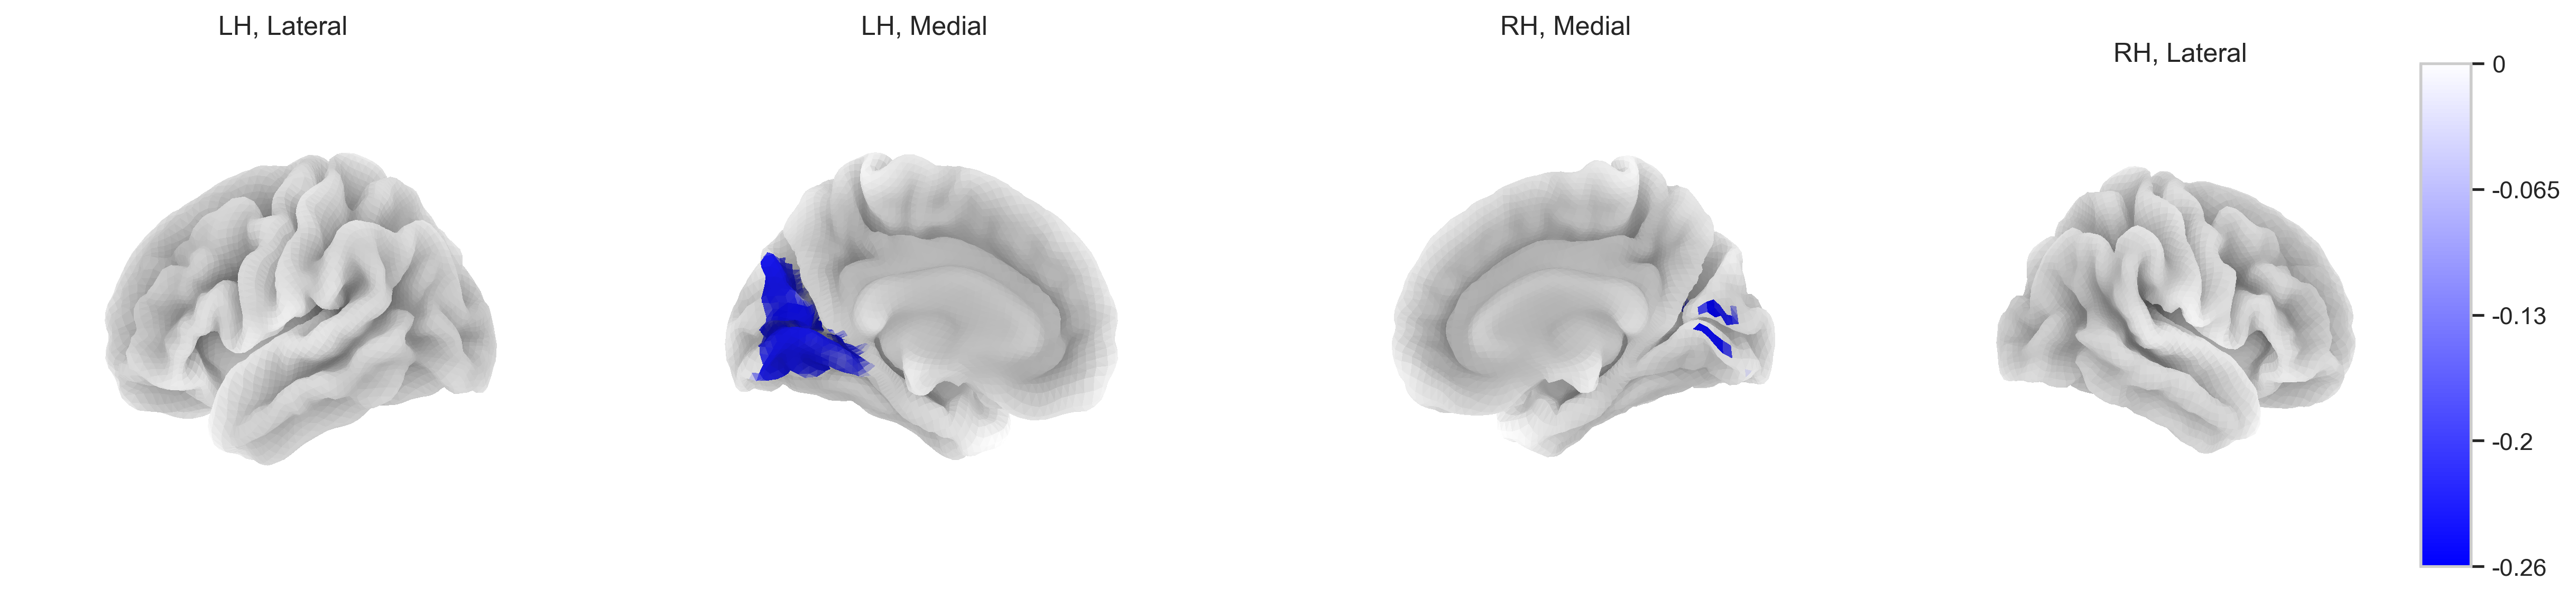

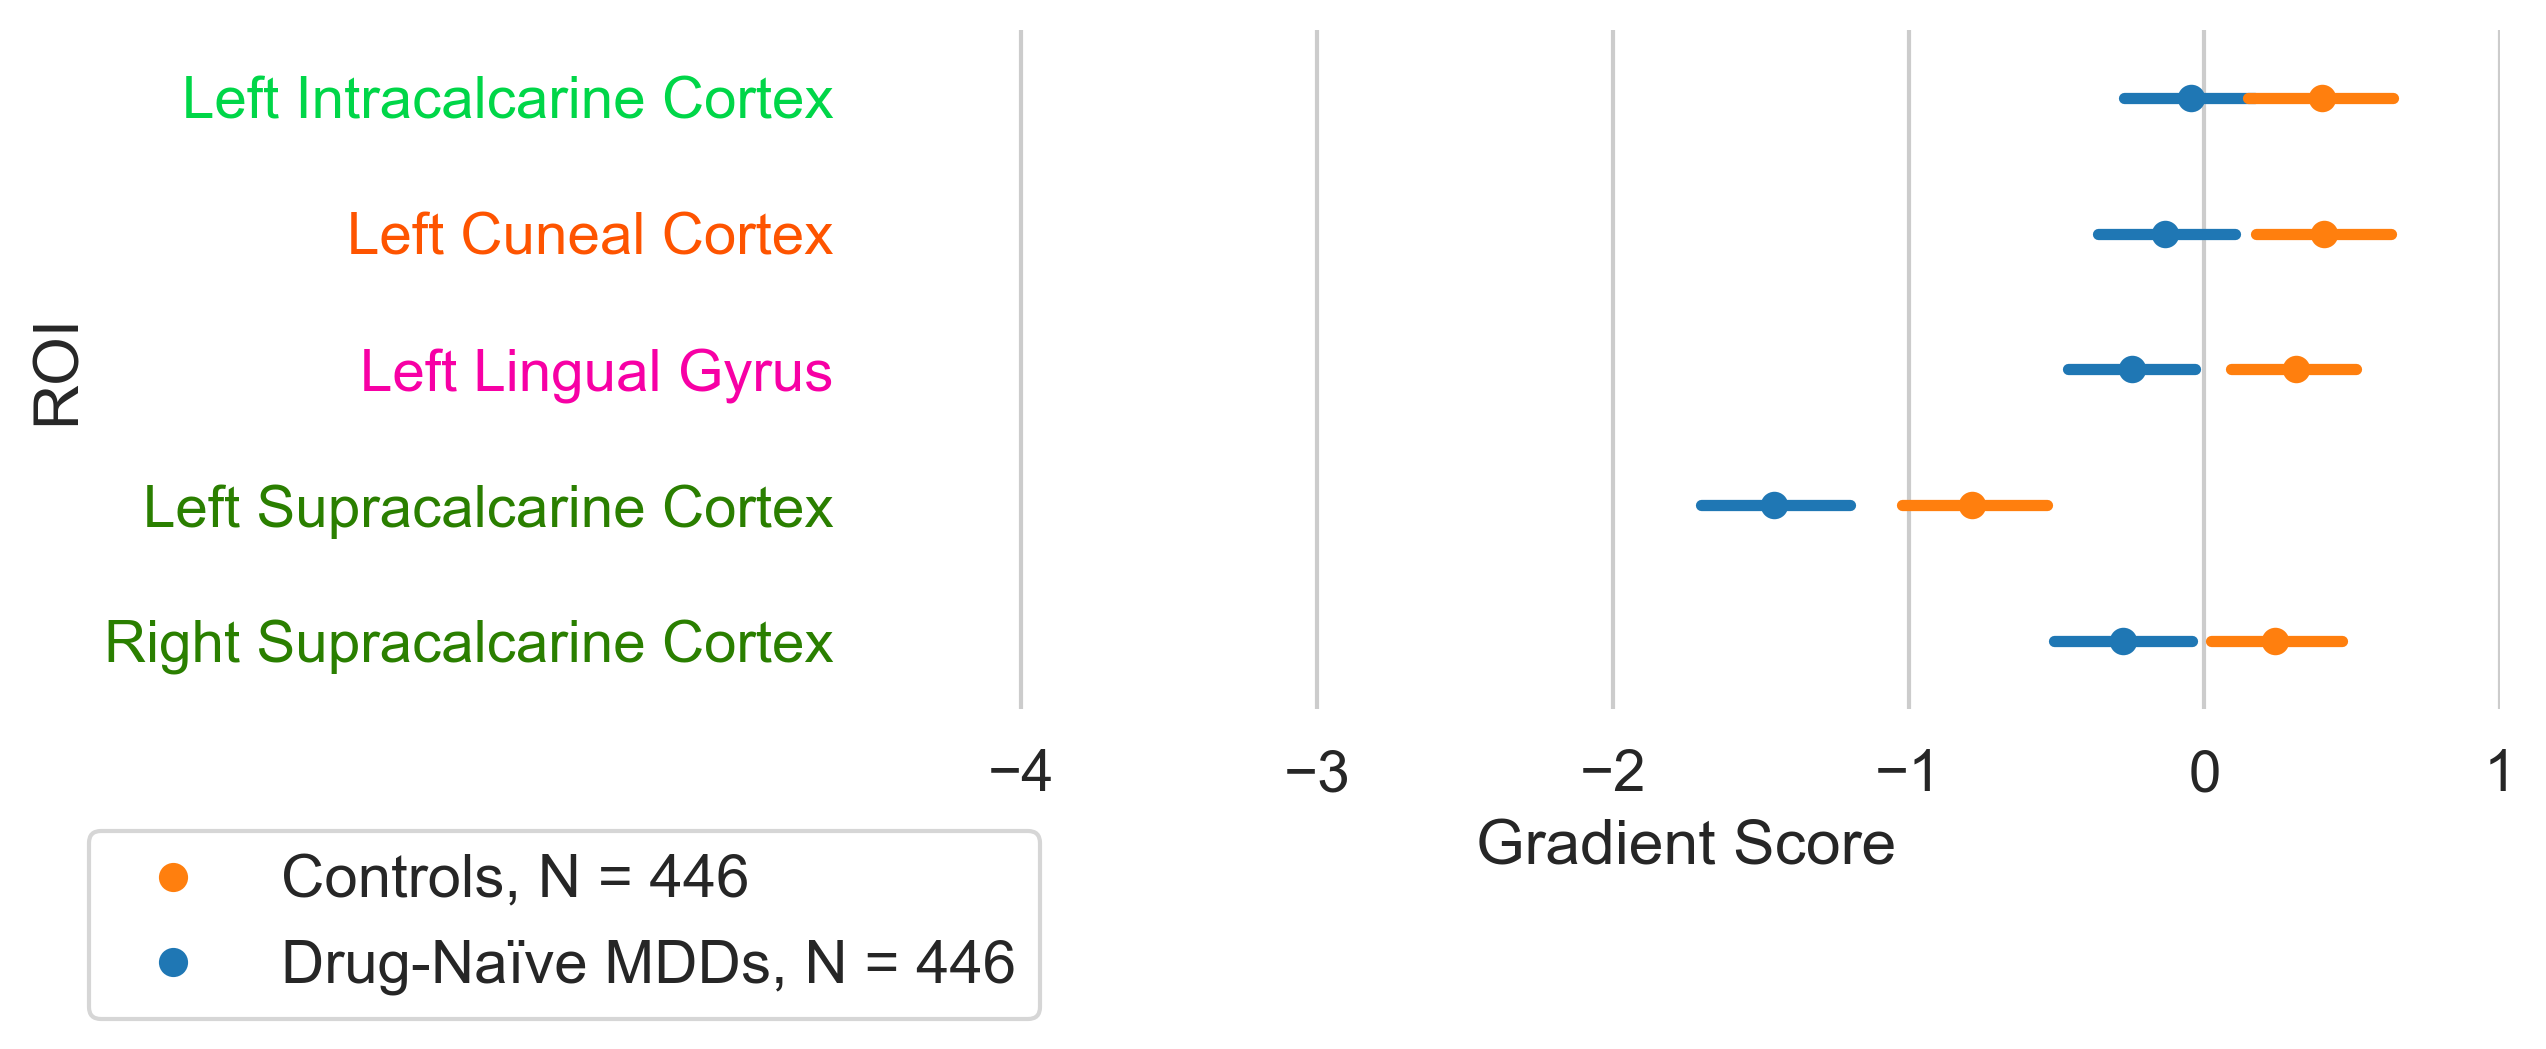

In [53]:
print('1st Gradient, Drug-Naïve MDDs vs. Controls:\n')
print_cohen_d(ols_perm_d_DN_NC_1)
plot_stat_surf(ols_perm_d_DN_NC_1, 'pial', 'bwr', colorbar_4 = True, darkness = 0.7)

data_sig_regions_DN_NC_1 = pointplot_df(permuted_DN_NC_1[0][0], projs_DN_MDD, projs_NC, 0, labels, ['Drug-Naïve MDDs',
                                                                                                   'Controls'])
import seaborn as sns
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots(figsize = (7, 3))
sns.despine(bottom=True, left=True)


# Show the conditional means
sns.pointplot(x='Gradient Score', y="ROI", hue="Group", palette = ['tab:blue'],
              data=data_sig_regions_DN_NC_1[data_sig_regions_DN_NC_1['Group'] == 'Drug-Naïve MDDs'], dodge=.532, join=False, scale=0.75, legend = False)
plt.legend([],[], frameon=False);
sns.pointplot(x='Gradient Score', y="ROI", hue="Group", palette = ['tab:orange'],
              data=data_sig_regions_DN_NC_1[data_sig_regions_DN_NC_1['Group'] == 'Controls'], dodge=.532, join=False, scale=0.75, legend = False, size = 20)
plt.legend([],[], frameon=False);

ax.tick_params(axis='x', labelsize= 14)
ax.tick_params(axis='y', labelsize= 14)
plt.xlabel('Gradient Score', fontsize = 15)
plt.ylabel('ROI', fontsize = 15)

# Improve the legend
colors=["tab:orange", "tab:blue"]
handles = []
for x in colors:
    handles.append(plt.Line2D([], [], color=x, marker="o", linewidth=0))
    
handles = [(plt.Line2D([], [], color=x, marker="o", linewidth=0)) for x in colors]
new_labels = ['Controls, N = 446' , 'Drug-Naïve MDDs, N = 446']
ax.get_yticklabels()[0].set_color("#00d648")
ax.get_yticklabels()[1].set_color('#fe5400')
ax.get_yticklabels()[2].set_color('#f700a5')
ax.get_yticklabels()[3].set_color('#2a7f00')
ax.get_yticklabels()[4].set_color('#2a7f00')
ax.legend(handles, new_labels, bbox_to_anchor=(-0.5, -0.5), loc='lower left', fontsize = 'large')

ax.set_xlim([-4.5, 1]);

The analyses revealed a significant group difference between mean scores of the first, uni-to-transmodal gradient in the regions overlapping with the visual network (see above: the colors of the region labels on the y-axis correspond to the regions delineated in the Harvard-Oxford atlas). A closer comparison of the mean scores of the left intracalcarine cortex, left cuneal cortex, left lingual gyrus and right supracalcarine cortex revealed that while the values were in both groups distributed around zero, in the drug-naïve group, being on the negative side of the spectrum, they were closer to transmodal regions. The same is true for the left supracalcarine cortex with a score farther from zero in the transmodal direction than that of its equivalent in controls. These findings are in line with the results reported in {cite:t}`yan_reduced_2019` , namely lower functional connectivity within the visual network in first-episode drug-naïve patients compared to controls.


2nd Gradient, Drug-Naïve MDDs vs. Controls:

Left Middle Temporal Gyrus, temporooccipital part , Cohen's d =  -0.23782864428990386
Right Angular Gyrus , Cohen's d =  0.2718172169707965
Right Paracingulate Gyrus , Cohen's d =  0.2496368046258911


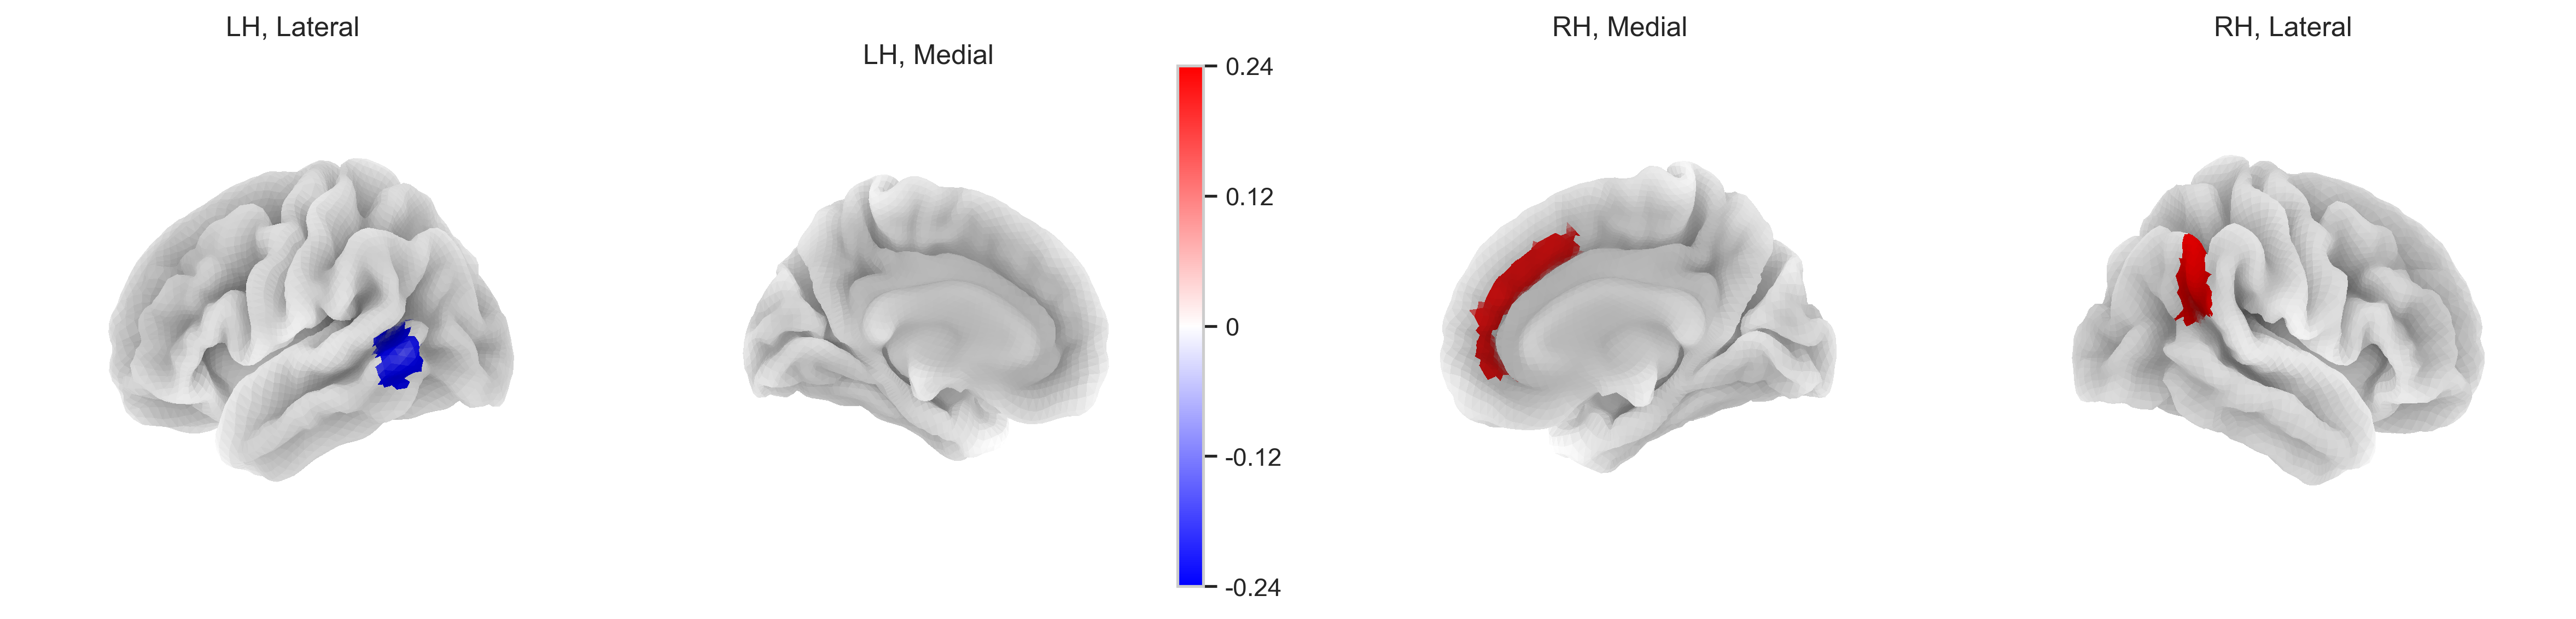

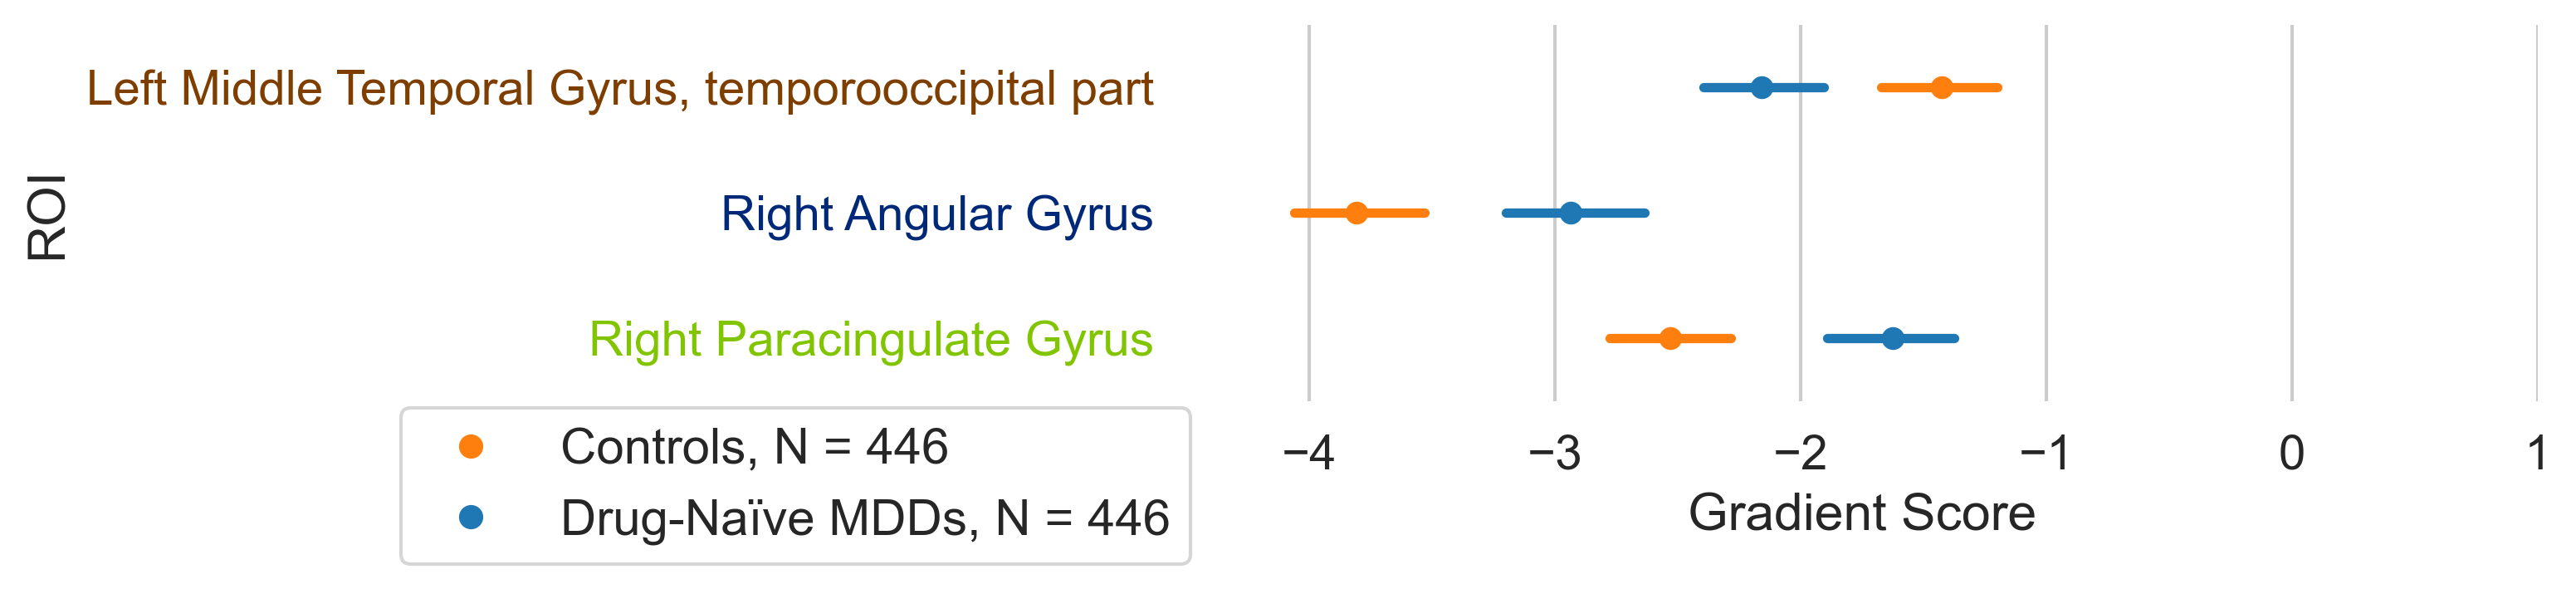

In [60]:
print('\n2nd Gradient, Drug-Naïve MDDs vs. Controls:\n')
print_cohen_d(ols_perm_d_DN_NC_2)

plot_stat_surf(ols_perm_d_DN_NC_2, 'pial', 'bwr', colorbar_2 = True, darkness = 0.7)

data_sig_regions_DN_NC_2 = pointplot_df(permuted_DN_NC_2[0][0], projs_DN_MDD, projs_NC, 1, labels, ['Drug-Naïve MDDs',
                                                                                                   'Controls'])

plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots(figsize = (7, 2))
sns.despine(bottom=True, left=True)

# Show the conditional means
sns.pointplot(x='Gradient Score', y="ROI", hue="Group", palette = ['tab:blue'],
              data=data_sig_regions_DN_NC_2[data_sig_regions_DN_NC_2['Group'] == 'Drug-Naïve MDDs'], dodge=.532, join=False, scale = 0.75, legend = False)
plt.legend([],[], frameon=False)
sns.pointplot(x='Gradient Score', y="ROI", hue="Group", palette = ['tab:orange'],
              data=data_sig_regions_DN_NC_2[data_sig_regions_DN_NC_2['Group'] == 'Controls'], dodge=.532, join=False, scale = 0.75, legend = False, size = 20)
plt.legend([],[], frameon=False)

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Gradient Score', fontsize = 15)
plt.ylabel('ROI', fontsize = 15)

# Improve the legend
colors=["tab:orange", "tab:blue"]
handles = []
for x in colors:
    handles.append(plt.Line2D([], [], color=x, marker="o", linewidth=0))
    
handles = [(plt.Line2D([], [], color=x, marker="o", linewidth=0)) for x in colors]
new_labels = ['Controls, N = 446' , 'Drug-Naïve MDDs, N = 446']
ax.legend(handles, new_labels, bbox_to_anchor=(-0.6, -0.5), loc='lower left', fontsize = 'large')

ax.get_yticklabels()[0].set_color("#7e3e00")
ax.get_yticklabels()[1].set_color('#002878')
ax.get_yticklabels()[2].set_color('#81c500')

ax.set_xlim([-4.5, 1]);

In the second gradient, the regions having the greatest spatial overlap with the DMN (above: the right angular gyrus and right paracingulate gyrus) were closer to zero in the drug-naïve group and, consequently, to the DMN which, as pointed out above, was attributed transitional values near zero. Conversely, in controls, these same regions were closer to the ventral attention network in terms of scores. The sign of the effect was reversed for the left middle temporal gyrus, temporooccipital part, which covers the junction of the DMN, frontoparietal and ventral attention networks: the region was situated farther away from zero along the second gradient in the drug-naïve group. This shift towards the negative end of the spectrum makes this region functionally closer to the networks obtaining similar scores in controls: the ventral attention and frontoparietal.

## Disruption of the second Gradient within Ventral Attention Network in Patients on Medication

In [61]:
#MED vs. NC, 1st Gradient
data_sig_regions_MED_NC_1 = pointplot_df(permuted_MED_NC_1[0][0], projs_MED_MDD, projs_NC_small, 0, labels, ['MDDs on Medication',
                                                                                                   'Controls'])

No significant difference between groups.



2nd Gradient, MDDs on Medication vs. Controls:

Right Frontal Operculum Cortex , Cohen's d =  0.23198477816467322


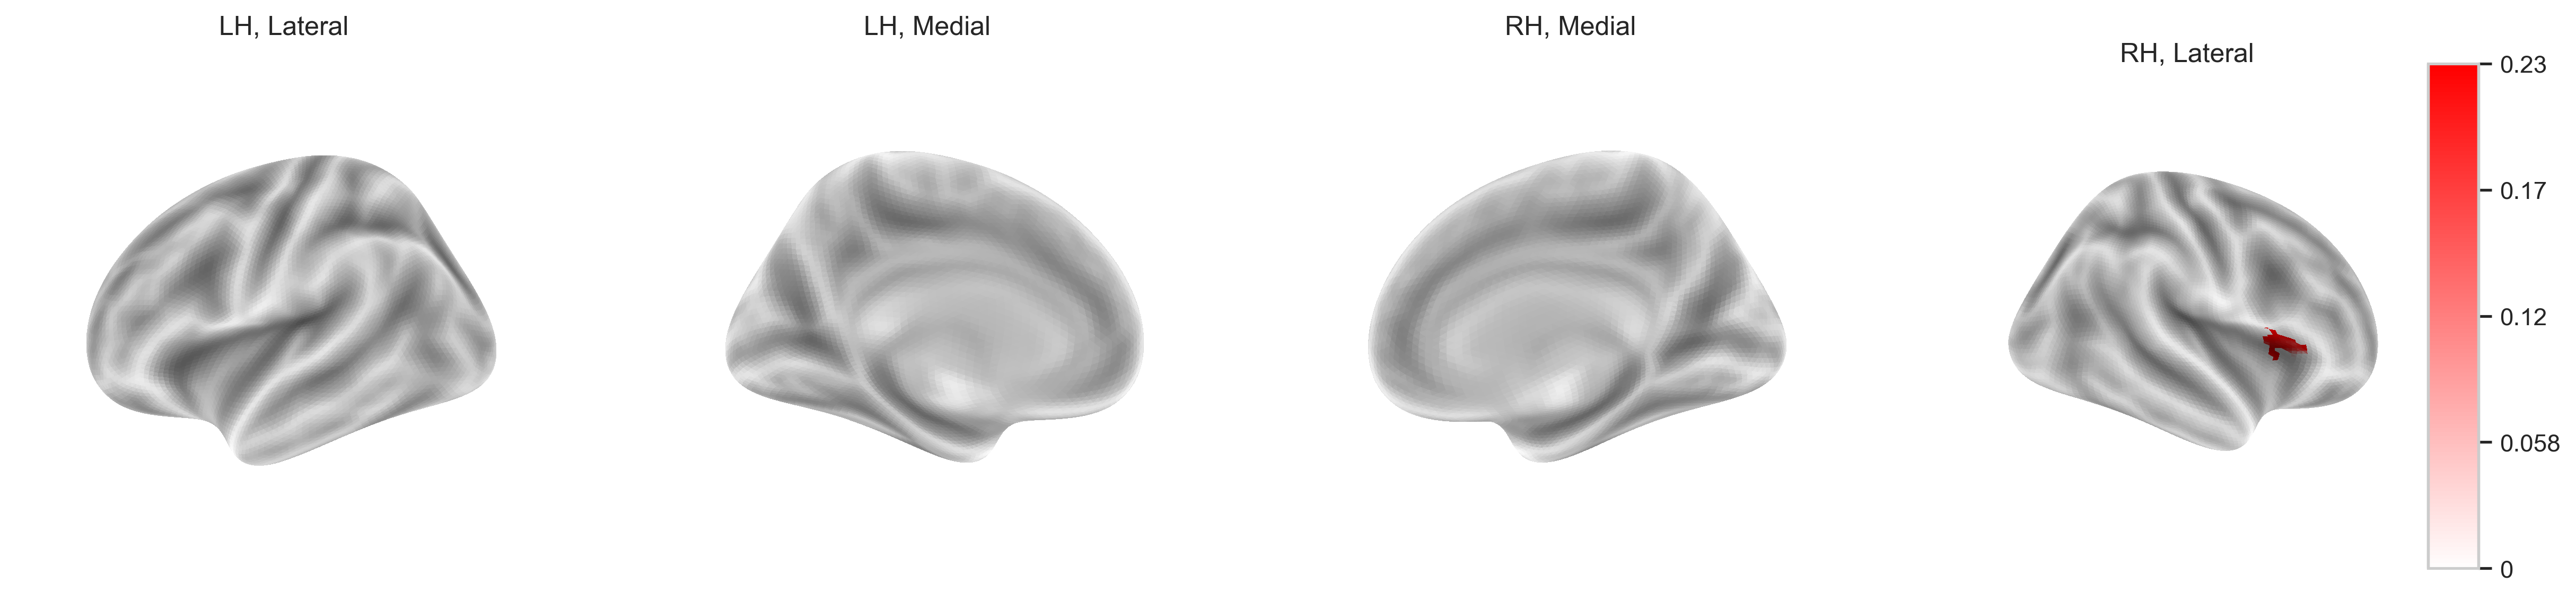

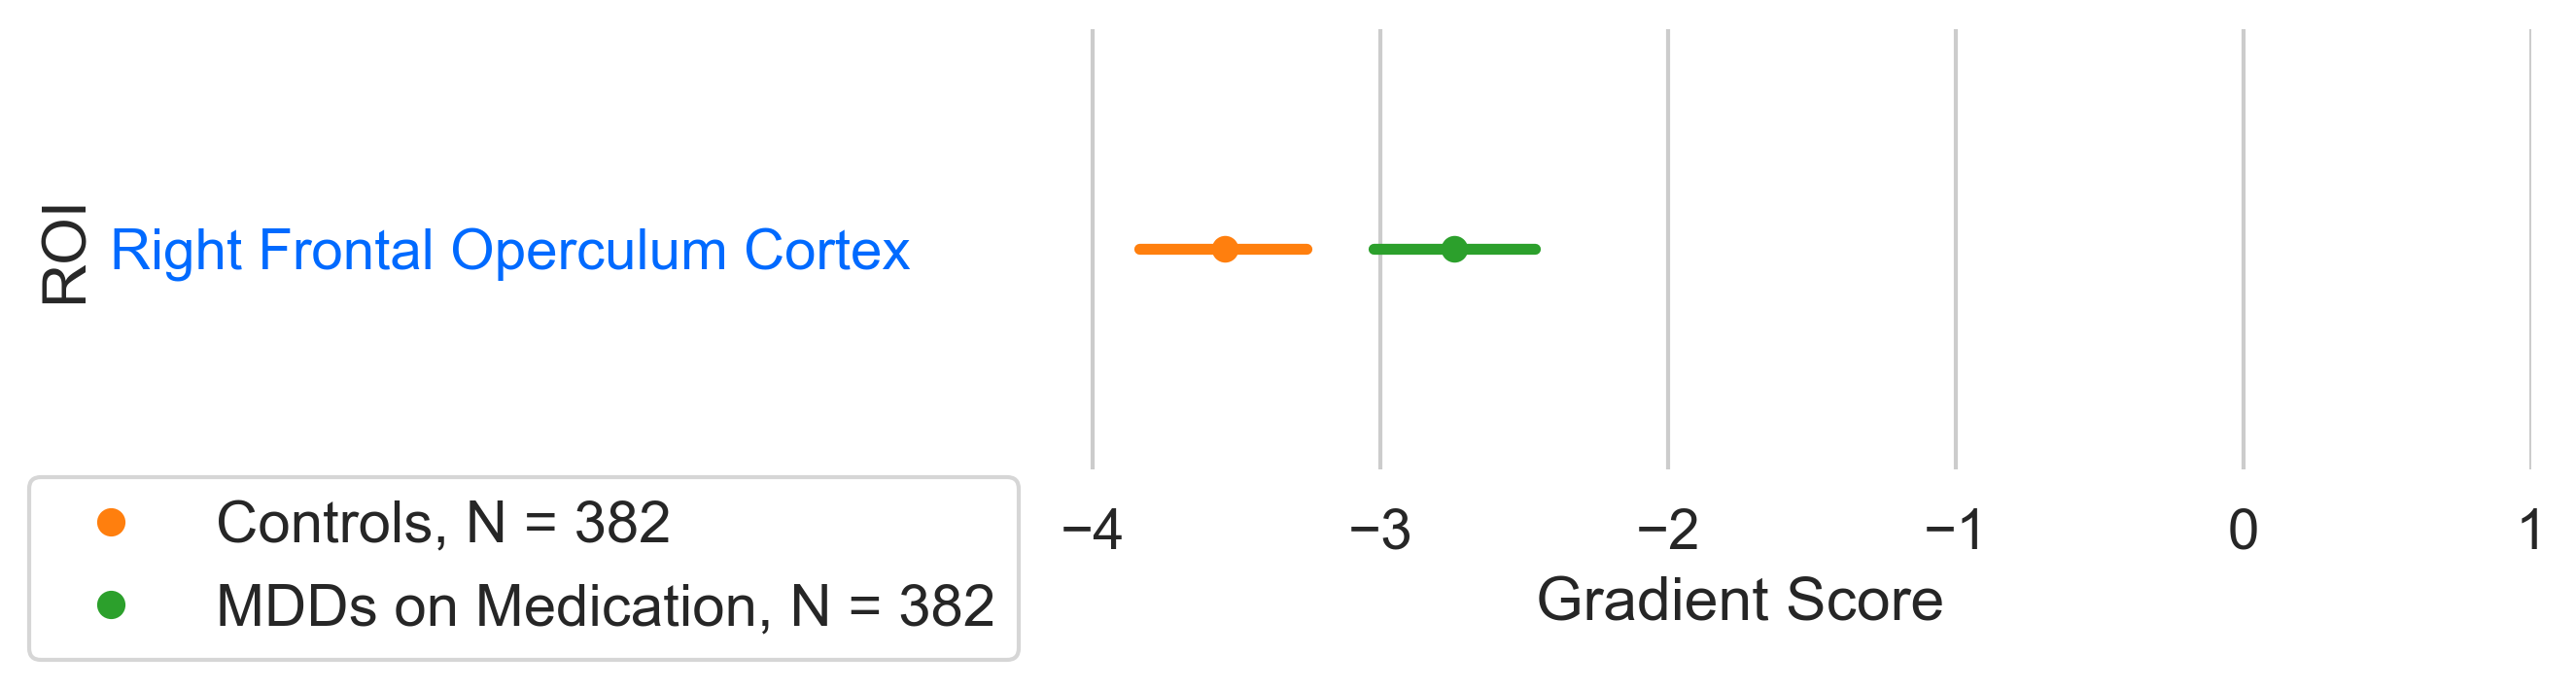

In [63]:
print('\n2nd Gradient, MDDs on Medication vs. Controls:\n')
print_cohen_d(ols_perm_d_MED_NC_2)

plot_stat_surf(ols_perm_d_MED_NC_2, 'infl', 'bwr', colorbar_4 = True, darkness = 0.7)

data_sig_regions_MED_NC_2 = pointplot_df(permuted_MED_NC_2[0][0], projs_MED_MDD, projs_NC_small, 1, labels, ['MDDs on Medication',
                                                                                                   'Controls'])

plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots(figsize = (7, 2))
sns.despine(bottom=True, left=True)

# Show the conditional means
sns.pointplot(x='Gradient Score', y="ROI", hue="Group", palette = ['tab:green'],
              data=data_sig_regions_MED_NC_2[data_sig_regions_MED_NC_2['Group'] == 'MDDs on Medication'], dodge=.532, join=False, scale = 0.75, legend = False)
plt.legend([],[], frameon=False)
sns.pointplot(x='Gradient Score', y="ROI", hue="Group", palette = ['tab:orange'],
              data=data_sig_regions_MED_NC_2[data_sig_regions_MED_NC_2['Group'] == 'Controls'], dodge=.532, join=False, scale = 0.75, legend = False, size = 20)
plt.legend([],[], frameon=False)

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Gradient Score', fontsize = 15)
plt.ylabel('ROI', fontsize = 15)

# Improve the legend
colors=["tab:orange", "tab:green"]
handles = []
for x in colors:
    handles.append(plt.Line2D([], [], color=x, marker="o", linewidth=0))
    
handles = [(plt.Line2D([], [], color=x, marker="o", linewidth=0)) for x in colors]
new_labels = ['Controls, N = 382' , 'MDDs on Medication, N = 382']
ax.legend(handles, new_labels, bbox_to_anchor=(-0.6, -0.5), loc='lower left', fontsize = 'large')

ax.get_yticklabels()[0].set_color("#006aff")


ax.set_xlim([-4.5, 1]);


The comparison of the first gradient scores between controls and MDD patients on medication revealed a significant difference. However, the right frontal operculum, which is situated in the ventral attention network, had a significantly higher second gradient score in patients on medication (Cohen's d = 0.231). More specifically, it was closer to zero and farther from the negative end of the spectrum (above) occupied by the frontoparietal and ventral attention networks. This finding putatively suggests lower functional connectivity within the ventral attention network in subjects on antidepressants due to a longer distance between the region in question and the rest of the network along the second gradient.